In [1]:
import matplotlib.pyplot as plt
from TensorMol import *

Searching for Installed Optional Packages...


--------------------------
    ፐℇℕЅ⦾Ɽ-ᙏ⦾ℒ  0.0
--------------------------
By using this software you accept the terms of the GNU public license in 
COPYING, and agree to attribute the use of this software in publications as: 

K.Yao, J. E. Herr, J. Parkhill. TensorMol 0.0 (2016)
--------------------------
--------------------------


In [2]:
a=MSet("SmallMols_forcecut")
a.Load()
ele_count = [0,0,0,0]
for mol in a.mols:
	for at in mol.atoms:
		if at == 1:
			ele_count[0] += 1
		if at == 6:
			ele_count[1] += 1
		if at == 7:
			ele_count[2] += 1
		if at == 8:
			ele_count[3] += 1

Loaded, 249153 molecules 4417695 Atoms total [1 6 7 8] Types 


In [7]:
h_force = np.zeros((ele_count[0],5,3))
c_force = np.zeros((ele_count[1],5,3))
n_force = np.zeros((ele_count[2],5,3))
o_force = np.zeros((ele_count[3],5,3))
hcount,ccount,ncount,ocount = 0,0,0,0
for mol in a.mols:
    for i, at in enumerate(mol.atoms):
        if at == 1:
            h_force[hcount,0] = mol.properties["forces"][i]
            for j, atj in enumerate(mol.atoms):
                if i == j:
                    continue
                b = mol.coords[j]-mol.coords[i]
                if atj == 1:
                    h_force[hcount,1] += np.dot(mol.properties["forces"][i],(b/np.linalg.norm(b)).T)*(b/np.linalg.norm(b))
                if atj == 6:
                    h_force[hcount,2] += np.dot(mol.properties["forces"][i],(b/np.linalg.norm(b)).T)*(b/np.linalg.norm(b))
                if atj == 7:
                    h_force[hcount,3] += np.dot(mol.properties["forces"][i],(b/np.linalg.norm(b)).T)*(b/np.linalg.norm(b))
                if atj == 8:
                    h_force[hcount,4] += np.dot(mol.properties["forces"][i],(b/np.linalg.norm(b)).T)*(b/np.linalg.norm(b))
            hcount+=1
        if at == 6:
            c_force[ccount,0] = mol.properties["forces"][i]
            for j, atj in enumerate(mol.atoms):
                if i == j:
                    continue
                b = mol.coords[j]-mol.coords[i]
                if atj == 1:
                    c_force[ccount,1] += np.dot(mol.properties["forces"][i],(b/np.linalg.norm(b)).T)*(b/np.linalg.norm(b))
                if atj == 6:
                    c_force[ccount,2] += np.dot(mol.properties["forces"][i],(b/np.linalg.norm(b)).T)*(b/np.linalg.norm(b))
                if atj == 7:
                    c_force[ccount,3] += np.dot(mol.properties["forces"][i],(b/np.linalg.norm(b)).T)*(b/np.linalg.norm(b))
                if atj == 8:
                    c_force[ccount,4] += np.dot(mol.properties["forces"][i],(b/np.linalg.norm(b)).T)*(b/np.linalg.norm(b))
            ccount+=1
        if at == 7:
            n_force[ncount,0] = mol.properties["forces"][i]
            for j, atj in enumerate(mol.atoms):
                if i == j:
                    continue
                b = mol.coords[j]-mol.coords[i]
                if atj == 1:
                    n_force[ncount,1] += np.dot(mol.properties["forces"][i],(b/np.linalg.norm(b)).T)*(b/np.linalg.norm(b))
                if atj == 6:
                    n_force[ncount,2] += np.dot(mol.properties["forces"][i],(b/np.linalg.norm(b)).T)*(b/np.linalg.norm(b))
                if atj == 7:
                    n_force[ncount,3] += np.dot(mol.properties["forces"][i],(b/np.linalg.norm(b)).T)*(b/np.linalg.norm(b))
                if atj == 8:
                    n_force[ncount,4] += np.dot(mol.properties["forces"][i],(b/np.linalg.norm(b)).T)*(b/np.linalg.norm(b))
            ncount+=1
        if at == 8:
            o_force[ocount,0] = mol.properties["forces"][i]
            for j, atj in enumerate(mol.atoms):
                if i == j:
                    continue
                b = mol.coords[j]-mol.coords[i]
                if atj == 1:
                    o_force[ocount,1] += np.dot(mol.properties["forces"][i],(b/np.linalg.norm(b)).T)*(b/np.linalg.norm(b))
                if atj == 6:
                    o_force[ocount,2] += np.dot(mol.properties["forces"][i],(b/np.linalg.norm(b)).T)*(b/np.linalg.norm(b))
                if atj == 7:
                    o_force[ocount,3] += np.dot(mol.properties["forces"][i],(b/np.linalg.norm(b)).T)*(b/np.linalg.norm(b))
                if atj == 8:
                    o_force[ocount,4] += np.dot(mol.properties["forces"][i],(b/np.linalg.norm(b)).T)*(b/np.linalg.norm(b))
            ocount+=1

In [11]:
h_force[0,0], h_force[0,1], h_force[0,2], h_force[0,3], h_force[0,4], h_force[0,1]+ h_force[0,2]+h_force[0,3]+ h_force[0,4]

(array([-10.95947665,  11.17114571,  -0.95790624]),
 array([-52.77503581,  24.5048142 ,  -4.66157446]),
 array([-25.21933228,   3.60708943,   5.59455314]),
 array([-12.47219401,   9.83434209,  -4.46960812]),
 array([-21.56290833,   6.98595977,   3.4455969 ]),
 array([ -1.12029470e+02,   4.49322055e+01,  -9.10325395e-02]))

In [76]:
mol = a.mols[0]
hcount,ccount,ncount,ocount = 0,0,0,0
h_forcet = np.zeros((14,4,14,3))
c_forcet = np.zeros((7,4,14,3))
n_forcet = np.zeros((2,4,14,3))
o_forcet = np.zeros((3,4,14,3))
for i, at in enumerate(mol.atoms):
    hhcount,hccount,hncount,hocount = 0,0,0,0
    chcount,cccount,cncount,cocount = 0,0,0,0
    nhcount,nccount,nncount,nocount = 0,0,0,0
    ohcount,occount,oncount,oocount = 0,0,0,0
    if at == 1:
        for j, atj in enumerate(mol.atoms):
            if i == j:
                continue
            b = mol.coords[j]-mol.coords[i]
            if atj == 1:
                h_forcet[hcount,0,hhcount] += (np.dot(mol.properties["forces"][i],(b/np.linalg.norm(b)).T)*(b/np.linalg.norm(b)))/(np.linalg.norm(b)**7)
                hhcount += 1
            if atj == 6:
                h_forcet[hcount,1,hccount] += (np.dot(mol.properties["forces"][i],(b/np.linalg.norm(b)).T)*(b/np.linalg.norm(b)))/(np.linalg.norm(b)**7)
                hccount += 1
            if atj == 7:
                h_forcet[hcount,2,hncount] += (np.dot(mol.properties["forces"][i],(b/np.linalg.norm(b)).T)*(b/np.linalg.norm(b)))/(np.linalg.norm(b)**7)
                hncount += 1
            if atj == 8:
                h_forcet[hcount,3,hocount] += (np.dot(mol.properties["forces"][i],(b/np.linalg.norm(b)).T)*(b/np.linalg.norm(b)))/(np.linalg.norm(b)**7)
                hocount += 1
        hcount+=1
    if at == 6:
        for j, atj in enumerate(mol.atoms):
            if i == j:
                continue
            b = mol.coords[j]-mol.coords[i]
            if atj == 1:
                c_forcet[ccount,0,chcount] += (np.dot(mol.properties["forces"][i],(b/np.linalg.norm(b)).T)*(b/np.linalg.norm(b)))/(np.linalg.norm(b)**7)
                hhcount += 1
                chcount += 1
            if atj == 6:
                c_forcet[ccount,1,cccount] += (np.dot(mol.properties["forces"][i],(b/np.linalg.norm(b)).T)*(b/np.linalg.norm(b)))/(np.linalg.norm(b)**7)
                hhcount += 1
                cccount += 1
            if atj == 7:
                c_forcet[ccount,2,cncount] += (np.dot(mol.properties["forces"][i],(b/np.linalg.norm(b)).T)*(b/np.linalg.norm(b)))/(np.linalg.norm(b)**7)
                hhcount += 1
                cncount += 1
            if atj == 8:
                c_forcet[ccount,3,cocount] += (np.dot(mol.properties["forces"][i],(b/np.linalg.norm(b)).T)*(b/np.linalg.norm(b)))/(np.linalg.norm(b)**7)
                hhcount += 1
                cocount += 1
        ccount+=1
    if at == 7:
        for j, atj in enumerate(mol.atoms):
            if i == j:
                continue
            b = mol.coords[j]-mol.coords[i]
            if atj == 1:
                n_forcet[ncount,0,nhcount] += (np.dot(mol.properties["forces"][i],(b/np.linalg.norm(b)).T)*(b/np.linalg.norm(b)))/(np.linalg.norm(b)**7)
                hhcount += 1
                nhcount += 1
            if atj == 6:
                n_forcet[ncount,1,nccount] += (np.dot(mol.properties["forces"][i],(b/np.linalg.norm(b)).T)*(b/np.linalg.norm(b)))/(np.linalg.norm(b)**7)
                hhcount += 1
                nccount += 1
            if atj == 7:
                n_forcet[ncount,2,nncount] += (np.dot(mol.properties["forces"][i],(b/np.linalg.norm(b)).T)*(b/np.linalg.norm(b)))/(np.linalg.norm(b)**7)
                hhcount += 1
                nncount += 1
            if atj == 8:
                n_forcet[ncount,3,nocount] += (np.dot(mol.properties["forces"][i],(b/np.linalg.norm(b)).T)*(b/np.linalg.norm(b)))/(np.linalg.norm(b)**7)
                hhcount += 1
                nocount += 1
        ncount+=1
    if at == 8:
        for j, atj in enumerate(mol.atoms):
            if i == j:
                continue
            b = mol.coords[j]-mol.coords[i]
            if atj == 1:
                o_forcet[ocount,0,ohcount] += (np.dot(mol.properties["forces"][i],(b/np.linalg.norm(b)).T)*(b/np.linalg.norm(b)))/(np.linalg.norm(b)**7)
                hhcount += 1
                ohcount += 1
            if atj == 6:
                o_forcet[ocount,1,occount] += (np.dot(mol.properties["forces"][i],(b/np.linalg.norm(b)).T)*(b/np.linalg.norm(b)))/(np.linalg.norm(b)**7)
                hhcount += 1
                occount += 1
            if atj == 7:
                o_forcet[ocount,2,oncount] += (np.dot(mol.properties["forces"][i],(b/np.linalg.norm(b)).T)*(b/np.linalg.norm(b)))/(np.linalg.norm(b)**7)
                hhcount += 1
                oncount += 1
            if atj == 8:
                o_forcet[ocount,3,oocount] += (np.dot(mol.properties["forces"][i],(b/np.linalg.norm(b)).T)*(b/np.linalg.norm(b)))/(np.linalg.norm(b)**7)
                hhcount += 1
                oocount += 1
        ocount+=1

In [86]:
print c_forcet

[[[[ -4.84757309e+01  -1.28773196e+01  -9.92799646e-03]
   [ -2.45125618e-01  -7.35598138e-01  -2.96117192e+00]
   [ -6.29323424e-03  -1.98154429e-02   2.48309111e-02]
   ..., 
   [ -1.06204354e-03  -9.32815180e-04   8.85983272e-05]
   [ -2.64856535e-03  -1.54901450e-03  -9.07218113e-04]
   [ -2.25114169e-04  -1.41770070e-04  -4.45094595e-05]]

  [[ -1.71122460e+00  -5.25909119e-01   7.29214269e-01]
   [ -4.28578038e-03  -1.96690784e-04   1.20014864e-03]
   [ -8.17423750e-04   2.29000433e-04   2.28704235e-04]
   ..., 
   [  0.00000000e+00   0.00000000e+00   0.00000000e+00]
   [  0.00000000e+00   0.00000000e+00   0.00000000e+00]
   [  0.00000000e+00   0.00000000e+00   0.00000000e+00]]

  [[ -2.35313747e+00   1.34041568e+00  -1.57754311e+00]
   [ -8.49312251e-02   2.09712526e-03   5.29420155e-03]
   [  0.00000000e+00   0.00000000e+00   0.00000000e+00]
   ..., 
   [  0.00000000e+00   0.00000000e+00   0.00000000e+00]
   [  0.00000000e+00   0.00000000e+00   0.00000000e+00]
   [  0.00000000e

In [115]:
force = np.zeros(100000)
delforce = np.zeros(100000)
it=0
for mol in a.mols:
    for i, at in enumerate(mol.atoms):
        tmpdelfrc = np.zeros(3)
        for j, atj in enumerate(mol.atoms):
            if i == j:
                continue
            b = mol.coords[j]-mol.coords[i]
            tmpdelfrc += (np.dot(mol.properties["forces"][i],(b/np.linalg.norm(b)).T)*(b/np.linalg.norm(b)))/(np.linalg.norm(b)**7)
        for j in range(3):
            force[it] = mol.properties["forces"][i,j]
            delforce[it] = tmpdelfrc[j]
            it += 1
            if it == 100000:
                break
        if it == 100000:
            break
    if it == 100000:
        break

In [116]:
print np.mean(force), np.std(force)
print np.mean(force-delforce), np.std(force-delforce)

0.000743336663329 21.7943694699
-0.00279902057482 14.5894625785


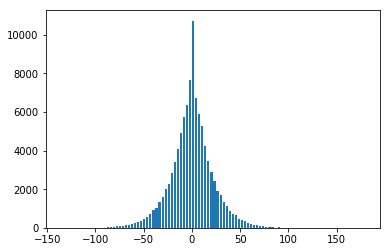

In [117]:
import matplotlib.pyplot as plt
hist, bins = np.histogram(force, bins=100)
width = 0.7 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt.bar(center, hist, align='center', width=width)
plt.show()

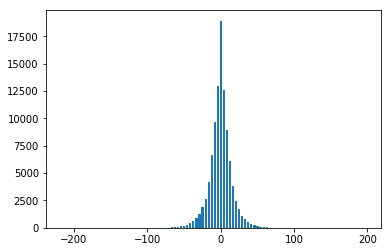

In [118]:
hist, bins = np.histogram(force-delforce, bins=100)
width = 0.7 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt.bar(center, hist, align='center', width=width)
plt.show()

In [201]:
numsamp = 10000000
chdelfrc = np.zeros((numsamp,2))
it=0
for mol in a.mols:
    for i, at in enumerate(mol.atoms):
        if at != 6:
            continue
        tmpdelfrc = np.zeros(3)
        for j, atj in enumerate(mol.atoms):
            if atj != 1:
                continue
            if i == j:
                continue
            b = mol.coords[j]-mol.coords[i]
            chdelfrc[it,0] = np.linalg.norm((np.dot(mol.properties["forces"][i],(b/np.linalg.norm(b)).T)*(b/np.linalg.norm(b)))/(np.linalg.norm(b)**7))
            chdelfrc[it,1] = np.linalg.norm(b)
            it += 1
            if it == numsamp:
                break
        if it == numsamp:
            break
    if it == numsamp:
        break

In [290]:
chplt = np.zeros((96,3))
dellist = []
jt = 0
for i in range(0,96):
    chplt[i,0] = i*0.0125
    chplt[i,1] = np.mean(chdelfrc[np.where(np.logical_and(chdelfrc[:,1]>=i*0.0125, chdelfrc[:,1]<(i+1)*0.0125))[0],0])
    chplt[i,2] = np.std(chdelfrc[np.where(np.logical_and(chdelfrc[:,1]>=i*0.0125, chdelfrc[:,1]<(i+1)*0.0125))[0],0])
    if np.isnan(chplt[i]).any():
        dellist.append(i)
chplt = np.delete(chplt, dellist, axis=0)

In [386]:
def Buckingham(a,b,c,r):
    return -((b*a*np.exp(-b*r))-(6*c/(r**7)))

def LJ(eps, rm, r):
    return (12*eps/r)*((rm/r)**12-(rm/r)**6)

def Morse(de, a, re, r):
    return (-2*a*de*np.exp(-a*(r-re))*(1-np.exp(-a*(r-re))))

def ErrorFuncBuck(prms):
    err = np.zeros(chplt.shape[0])
    for i in range(chplt.shape[0]):
        err[i] = (chplt[i,1] - Buckingham(prms[0], prms[1], prms[2], chplt[i,0]))**2
    print np.mean(np.sqrt(err)), np.std(np.sqrt(err))
    return np.sum(err)

def ErrorFuncLJ(prms):
    err = np.zeros(chplt.shape[0])
    for i in range(chplt.shape[0]):
        err[i] = (chplt[i,1] - LJ(prms[0], prms[1], chplt[i,0]))**2
    print np.mean(np.sqrt(err)), np.std(np.sqrt(err))
    return np.sum(err)

def ErrorFuncMorse(prms):
    err = np.zeros(chplt.shape[0])
    for i in range(chplt.shape[0]):
        err[i] = (chplt[i,1] - Morse(prms[0], prms[1], prms[2], chplt[i,0]))**2
    print np.mean(np.sqrt(err)), np.std(np.sqrt(err))
    return np.sum(err)

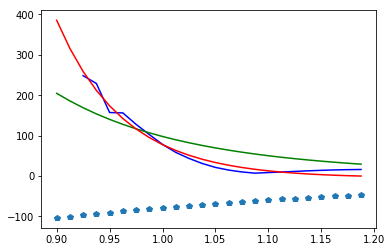

In [393]:
rs = np.arange(0.9, 1.2, 0.0125)
a, b, c = 449.53, 1893.28985256, 16.3220002
buck = -((b*a*np.exp(-b*rs))-(6*c/(rs**7)))
eps, rm = 1.2924551, 1.1867738
ljs = (12*eps/rs)*((rm/rs)**12-(rm/rs)**6)
de, a, re = 5.51134007, 1.09998022, 2.03018729
mrs = 2*a*de*np.exp(-a*(rs-re))*(1-np.exp(-a*(rs-re)))
plt.plot(chplt[:,0],chplt[:,1],"b",rs, buck,"g",rs, ljs,"r",rs, mrs,"p" )
plt.show()

In [391]:
import scipy.optimize
fun = lambda x: ErrorFuncBuck(x)
res = optimize.minimize(fun, np.array((449.53, 1893.28985256, 16.3220002)),method='L-BFGS-B', tol=1e-8)
print(res.message)
print(res.x)

34.1177540877 18.9844029132
34.1177540877 18.9844029132
34.1177540877 18.9844029132
34.1177540961 18.984402898
34.9622641715 18.2020607497
34.9622641715 18.2020607497
34.9622641715 18.2020607497
34.9622641799 18.2020607496
34.117843361 18.9842424667
34.117843361 18.9842424667
34.117843361 18.9842424667
34.1178433694 18.9842424516
CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH
[  449.53        1893.28985256    16.32210591]


In [402]:
fun = lambda x: ErrorFuncLJ(x)
res = optimize.minimize(fun, np.array((5.495282, 1.07272111)),method='L-BFGS-B', tol=1e-8, options={"maxiter":5000000,"maxfun":10000000})
print(res.message)
print(res.x)

20.8249871311 10.0490502121
20.824987095 10.0490501448
20.8249813117 10.049044564
328130.672747 308804.405485
328130.673343 308804.406046
328130.691869 308804.42343
1925.41746281 1935.90636962
1925.41746643 1935.90637327
1925.41765214 1935.90655321
97.2084164337 113.521187192
97.2084167114 113.521187538
97.2084371002 113.521211405
17.3612683683 8.38256682927
17.3612683519 8.38256692006
17.3612643835 8.38257470623
17.2997262434 8.50633102788
17.299726227 8.50633112236
17.2997222498 8.5063392125
17.307239572 8.49084978341
17.3072395556 8.49084987744
17.3072355795 8.49085793076
17.3169635654 8.47060219751
17.316963549 8.47060229094
17.3169595743 8.47061029556
17.3337468543 8.43506698069
17.3337468379 8.43506707307
17.3337428657 8.43507499063
17.3589728197 8.38012568224
17.3589728034 8.38012577296
17.3589688352 8.38013355181
17.3975288919 8.29201762347
17.3975288756 8.2920177114
17.3975249139 8.29202525661
17.4523353261 8.15551821224
17.4523353099 8.15551829553
17.452331359 8.15552544802
1

In [392]:
fun = lambda x: ErrorFuncMorse(x)
res = optimize.minimize(fun, np.array((5.495282, 0.2, 1.07272111)),method='L-BFGS-B', tol=1e-8)
print(res.message)
print(res.x)

63.213978669 72.9119335116
63.213978669 72.9119335115
63.2139786681 72.9119335085
63.2139786645 72.9119335114
48.4499791504 67.453702911
48.4499791359 67.4537028934
48.4499788665 67.4537025609
48.4499789444 67.4537026629
1.56388217377e+13 8.70978255266e+12
1.56388217658e+13 8.70978256833e+12
1.56388229388e+13 8.7097832442e+12
1.56388228712e+13 8.70978318398e+12
8608.59227123 2431.09346716
8608.59228693 2431.09347168
8608.59262655 2431.09358211
8608.59258864 2431.09355744
61.6814564733 25.4691768278
61.6814565483 25.4691768679
61.6814577912 25.469177565
61.6814576779 25.4691774546
46.3031950691 60.8877294963
46.3031950643 60.8877294602
46.3031949502 60.8877288066
46.3031950251 60.8877289689
50.2974140237 33.1638310019
50.2974140611 33.1638309275
50.2974146551 33.1638295689
50.2974146311 33.1638298898
50.2974140237 33.1638310019
50.2974140611 33.1638309275
50.2974146551 33.1638295689
50.2974146311 33.1638298898
inf nan
inf nan
inf nan
inf nan
50.2974140237 33.1638310019
50.2974140611 33.

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: overflow encountered in exp
  
/usr/local/lib/python2.7/dist-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/usr/local/lib/python2.7/dist-packages/scipy/optimize/optimize.py:628: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


125.387899724 34.8217014876


array([  1.18940942e-09,   5.71942787e+03,   6.00646558e+03,
         1.78767196e+04,   2.22570295e+04,   2.46778931e+04,
         2.47674227e+04,   2.42622739e+04,   2.35723505e+04,
         2.23472060e+04,   2.10365843e+04,   1.99137659e+04,
         1.88149376e+04,   1.77670760e+04,   1.76522298e+04,
         1.72252163e+04,   1.67033596e+04,   1.60625062e+04,
         1.52980160e+04,   1.44589767e+04,   1.35470541e+04,
         1.25963671e+04])